## <font color='yellow'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='yellow'>Introdução a Deep Learning com TensorFlow</font>

**Problema de Negócio:** Construir um modelo de Inteligência Artificial capaz de classificar imagens. 
Vejamos um exemplo com essas 10 categorias: ['`airplane`', '`automobile`', '`bird`', '`cat`', '`deer`', '`dog`', '`frog`', '`horse`', '`ship`', '`truck`']. 
Dada uma nova imagem de uma dessas categorias, o modelo deve ser capaz de classificar e indicar o que é a imagem.

### <font color=orange>Verificar a Versão da Linguagem Python</font>

* Esse código Python exibe a versão da linguagem Python que está sendo usada no ambiente do Jupyter Notebook. Ele importa a função `python_version` do módulo `platform` e, em seguida, imprime a versão do Python. Isso é útil para verificar a versão da linguagem e garantir que seu código seja compatível com essa versão específica.

In [1]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.11.3


https://www.tensorflow.org/

**ATENÇÃO**: O `TensorFlow` pode apresentar problemas em algumas versões de sistema operacional. Verifique a documentação oficial no link acima.

### <font color=orange>Instalar a biblioteca TensorFlow</font>

* Esse código Python realiza a instalação do `TensorFlow` na versão 2.12 de forma silenciosa. O '%' antes do comando '`pip`' indica que ele está sendo executado em um ambiente de notebook, como Jupyter. O `TensorFlow` é uma biblioteca de código aberto utilizada principalmente em aprendizado de máquina e redes neurais, e essa linha de código garante que a versão 2.12 seja instalada no ambiente de desenvolvimento, possibilitando o uso dessa versão específica para projetos futuros.

In [2]:
%pip install -q tensorflow==2.12

Note: you may need to restart the kernel to use updated packages.


### <font color=orange>Silenciar as mensagens do TensorFlow</font>

* Esse código Python ajusta as configurações do `TensorFlow` para suprimir mensagens de log com nível de importância abaixo de 3, tornando o ambiente de execução mais silencioso. Isso pode ser útil para evitar a exibição de mensagens informativas ou de depuração, deixando apenas as mensagens críticas visíveis, o que é útil em situações em que se deseja um ambiente de execução mais limpo e sem informações desnecessárias.

In [3]:
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


### <font color=orange>Efetuar a Importação das Bibliotecas Importantes</font>

* Esse código Python realiza as importações necessárias para criar um modelo de rede neural usando o TensorFlow. Ele importa o `TensorFlow` e módulos específicos, como `datasets`, `layers` e `models` para construir a rede. Além disso, são importadas bibliotecas para visualização, manipulação de imagens e matrizes, como o `Matplotlib` e o `NumPy`. A importação do `PIL` (Python Imaging Library) é feita para lidar com imagens. No entanto, o código não define explicitamente a lógica da rede neural; ele se concentra em preparar o ambiente para o desenvolvimento de modelos de machine learning.

In [4]:
# Imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### <font color=orange>Carregar o conjunto de dados CIFAR-10</font>

Fonte: https://www.cs.toronto.edu/~kriz/cifar.html

* No código apresentado, estamos carregando o conjunto de dados CIFAR-10, amplamente usado para tarefas de visão computacional. As imagens de treinamento e seus rótulos são armazenados nas variáveis `train_images` e `train_labels`, enquanto as imagens de teste e seus rótulos são armazenados nas variáveis `test_images` e `test_labels`. Esse passo é fundamental para preparar os dados para treinar e testar modelos de aprendizado de máquina, como redes neurais convolucionais, visando tarefas de classificação de imagens. É um primeiro passo importante em projetos de processamento de imagens e visão computacional.

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### <font color=orange>Listar as classes de imagens do conjunto de dados</font>

* O código Python acima cria uma lista chamada "image_classes" que contém 10 strings, representando diferentes classes de imagens, como 'avião', 'automóvel', 'pássaro', 'gato', 'veado', 'cachorro', 'sapo', 'cavalo', 'navio' e 'caminhão'. Em seguida, ele imprime essa lista na saída, exibindo os nomes das classes de imagens. Essa lista provavelmente está relacionada a um problema de classificação de imagens, onde cada classe representa um tipo específico de objeto a ser identificado em imagens.

In [6]:
image_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(image_classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## <font color=yellow>Pré-Processamento e Visualização das Imagens</font>

# <font color=orange>Normalizar os valores dos pixels para padronização da escala dos dados</font>

* Nesse código Python, estamos realizando a normalização dos valores dos pixels de imagens, o que é comum em tarefas de aprendizado de máquina e visão computacional. A operação divide todos os valores dos pixels nas imagens de treinamento e teste por 255. Isso resulta em escalar os valores de pixel no intervalo de 0 a 1, tornando os dados mais apropriados para processamento por algoritmos de machine learning, uma vez que garante que todos os recursos estejam na mesma escala, o que pode melhorar o desempenho do modelo.

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### <font color=orange>Criar uma função para exibir as imagens</font>

* O código Python acima define uma função chamada "`visualize_images`" que é utilizada para exibir imagens em um formato de grade. A função recebe duas listas, "`images`" e "`labels`", que representam imagens e rótulos correspondentes. Em seguida, cria uma grade de 6x6 subplots para exibir até 30 imagens. Cada subplot exibe uma imagem do conjunto "`images`" com seu rótulo correspondente. As configurações visuais incluem a remoção de marcações nos eixos, desativação de grades e a exibição da imagem em escala de cinza. A função é útil para visualizar um conjunto de dados de imagens com seus rótulos associados.

In [8]:
def visualize_images(images, labels):
    plt.figure(figsize = (13,13))
    for i in range(30):
        plt.subplot(6, 6, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(image_classes[labels[i][0]])
    plt.show()

### <font color=orange>Executar a visualização de imagens com os dados de treinamento</font>

* Esse código Python realiza a visualização de imagens usando os dados de treinamento. Ele chama uma função chamada "`visualize_images`" e passa como parâmetros as imagens de treinamento (`train_images`) e seus respectivos rótulos (`train_labels`), possibilitando a análise e compreensão das imagens de treinamento em um ambiente gráfico.

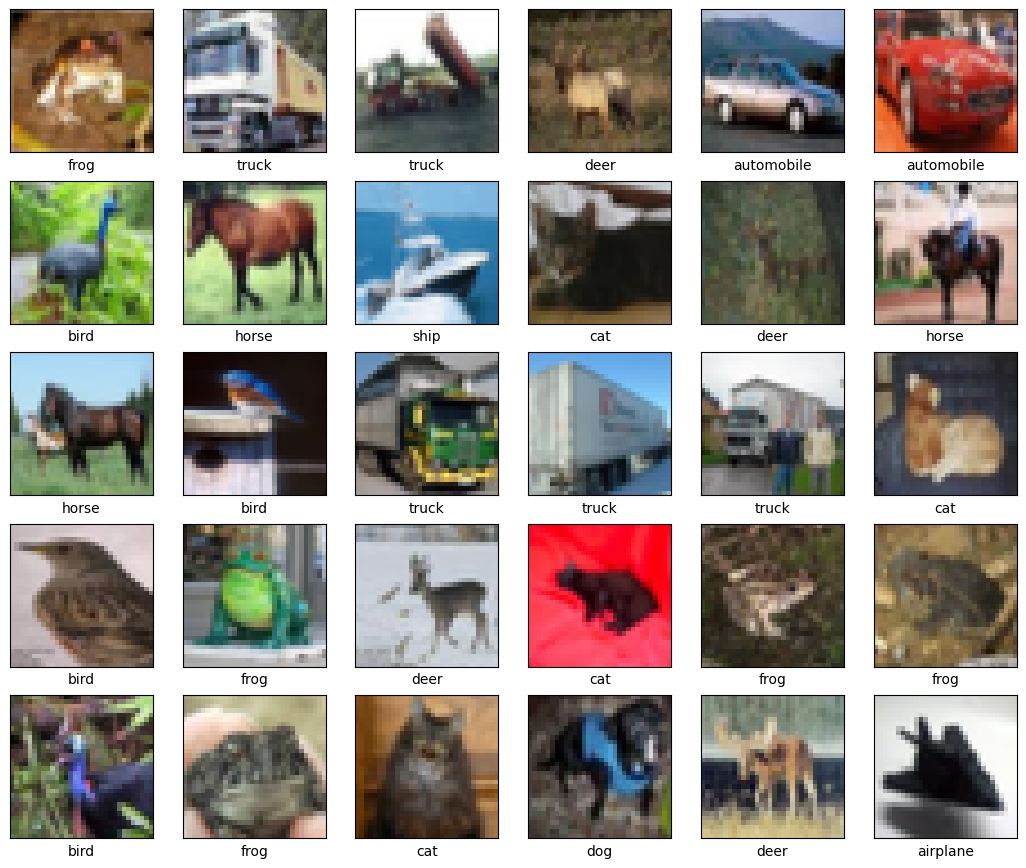

In [9]:
visualize_images(train_images, train_labels)

## <font color=orange>Construção do Modelo</font>

👉 A construção de modelos é discutido e explicado no site a seguir: <a href="www.deeplearningbook.com.br">www.deeplearningbook.com.br</a>

![DSA](imagens/convnet.jpg)

### <font color=orange>Criar o objeto do modelo sequencial e adicionar as camadas de convoluções</font>

* Esse código Python cria um modelo de rede neural convolucional (`CNN`) chamado `model_object` usando a biblioteca `Keras`. O modelo `model_object` começa com uma camada de convolução que usa 32 filtros de 3x3 com ativação ReLU e especifica o formato de entrada como 32x32x3 (imagens coloridas de 32x32 pixels). Em seguida, adiciona camadas de `max pooling` para reduzir a dimensionalidade. Isso é repetido com duas camadas adicionais de convolução e `max pooling`. Essas camadas são essenciais para extrair características das imagens e reduzir sua resolução antes de alimentar a rede neural densa subsequente. Esse código faz parte da construção de uma CNN para processar imagens.

In [10]:
# Cria o objeto do modelo sequencial de camadas
model_object = models.Sequential()

# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
model_object.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_object.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
model_object.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_object.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
model_object.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_object.add(layers.MaxPooling2D((2, 2)))

### <font color=orange>Adicionar as camadas de classificação</font>

* No código Python fornecido, estamos configurando a arquitetura de uma rede neural para classificação. Primeiro, usamos a função "`Flatten`" para transformar os dados de entrada em um vetor unidimensional, achatando as imagens. Em seguida, adicionamos uma camada densa com 64 neurônios e a função de ativação '`relu`', que ajuda a aprender padrões complexos nos dados. Finalmente, acrescentamos outra camada densa com 10 neurônios e a função de ativação '`softmax`', que é comumente usada em problemas de classificação, para produzir probabilidades de pertencer a cada uma das 10 classes de saída. Essas camadas juntas formam a estrutura da rede neural para o problema de classificação.

In [11]:
model_object.add(layers.Flatten())
model_object.add(layers.Dense(64, activation = 'relu'))
model_object.add(layers.Dense(10, activation = 'softmax'))

### <font color=orange>Exibir o resumo do modelo</font>

* O código Python exibe um resumo do modelo, fornecendo informações detalhadas sobre a arquitetura, as camadas e o número de parâmetros do modelo definido anteriormente. Isso é útil para avaliar a estrutura da rede neural e entender sua complexidade, o que é fundamental no desenvolvimento de aplicativos de aprendizado de máquina, permitindo ajustes e otimizações com base no resumo gerado.

In [12]:
model_object.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

### <font color=orange>Efetuar a compilação do modelo criado</font>

* Neste trecho de código Python, estamos realizando a compilação de um modelo de aprendizado de máquina. Utilizamos o otimizador '`adam`' para ajustar os pesos da rede neural, a função de perda '`sparse_categorical_crossentropy`' para calcular o erro entre as previsões do modelo e os rótulos reais, e as métricas '`accuracy`' para avaliar o desempenho do modelo com base na precisão. Isso prepara o modelo para o treinamento, permitindo que ele aprenda a partir dos dados de treinamento e seja avaliado com base na acurácia.

In [13]:
model_object.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### <font color=orange>Executar o treinamento do modelo de Machine Learning criado</font>

* Nesse trecho de código Python, estamos medindo o tempo de execução da função '`model_object.fit()`', que é usada para treinar um modelo de machine learning. Estamos passando as imagens de treinamento e suas respectivas etiquetas, definindo 10 épocas de treinamento e também especificando os dados de validação com imagens de teste e suas etiquetas. Isso é útil para acompanhar o desempenho do modelo durante o treinamento e validar sua precisão. A função '`%%time`' é uma mágica do Jupyter Notebook que nos permite medir o tempo gasto na execução desse bloco de código.

In [14]:
%%time
historical_training = model_object.fit(
    train_images, train_labels, 
    epochs = 10, 
    validation_data = (test_images, test_labels)
)

Epoch 1/10
1563/1563 [==============================] - 172s 99ms/step - loss: 1.5330 - accuracy: 0.4411 - val_loss: 1.2545 - val_accuracy: 0.5492
Epoch 2/10
1563/1563 [==============================] - 136s 87ms/step - loss: 1.1824 - accuracy: 0.5835 - val_loss: 1.1882 - val_accuracy: 0.5768
Epoch 3/10
1563/1563 [==============================] - 147s 94ms/step - loss: 1.0367 - accuracy: 0.6365 - val_loss: 1.0545 - val_accuracy: 0.6356
Epoch 4/10
1563/1563 [==============================] - 121s 77ms/step - loss: 0.9453 - accuracy: 0.6692 - val_loss: 0.9443 - val_accuracy: 0.6693
Epoch 5/10
1563/1563 [==============================] - 146s 94ms/step - loss: 0.8751 - accuracy: 0.6955 - val_loss: 0.9262 - val_accuracy: 0.6790
Epoch 6/10
1563/1563 [==============================] - 135s 86ms/step - loss: 0.8116 - accuracy: 0.7182 - val_loss: 0.9042 - val_accuracy: 0.6882
Epoch 7/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.7648 - accuracy: 0.7325 - val_loss: 0

### <font color=orange>Avaliar o modelo treinado</font>

* Esse trecho de código em Python realiza a avaliação de um modelo previamente treinado. Ele calcula o erro e a precisão do modelo ao utilizar um conjunto de dados de teste, representado por '`test_images`' e '`test_labels`'. O resultado é armazenado nas variáveis '`test_error`' e '`test_accuracy`', que representam o erro do teste e a precisão, respectivamente. O parâmetro '`verbose=2`' controla a exibição do processo de avaliação, onde '`2`' indica um nível mais detalhado de exibição.

In [15]:
test_error, test_accuracy = model_object.evaluate(test_images, test_labels, verbose=2)

313/313 - 16s - loss: 0.8665 - accuracy: 0.7100 - 16s/epoch - 50ms/step


### <font color=orange>Imprimir a acurácia dos dados de teste</font>

* O trecho de código Python exibe a precisão, denominada acurácia, dos dados de teste por meio do comando print. A expressão '`\nAcurácia com Dados de Teste:`' é utilizada como rótulo para identificar o tipo de informação que será apresentada, seguida pela variável `test_accuracy`, que presumivelmente contém o valor da acurácia calculada previamente. Este comando imprime na tela a mensagem "Acurácia com Dados de Teste:" seguida do valor armazenado na variável `test_accuracy`, fornecendo uma visão rápida da precisão do modelo em relação aos dados de teste.

In [17]:
print('\nAcurácia com Dados de Teste:', test_accuracy)


Acurácia com Dados de Teste: 0.7099999785423279


## <font color=yellow>Deploy do Modelo</font>

### <font color=orange>Carregar uma nova imagem</font>

* O código Python acima carrega uma nova imagem chamada "`nova_imagem.jpg`" localizada na pasta "`dados`". Para fazer isso, ele utiliza a biblioteca PIL (Pillow) para abrir a imagem, tornando-a disponível para manipulação posterior no programa.

In [18]:
new_image = Image.open("dados/nova_imagem.jpg")

### <font color=orange>Exibir as dimensões da imagem em pixels</font>

* O código em Python utiliza o método "`size`" em um objeto representando uma imagem para obter suas dimensões em pixels. O resultado, presumivelmente armazenado na variável "`new_image`," fornece as informações sobre a largura e altura da imagem. Essa abordagem simples e direta é útil para extrair detalhes cruciais da imagem, facilitando operações subsequentes no desenvolvimento de soluções relacionadas a processamento de imagens.

In [19]:
new_image.size

(1919, 1199)

### <font color=orange>Obter e exibir as dimensões de uma imagem em pixels</font>

* O código em Python acima destina-se a obter e exibir as dimensões de uma imagem em pixels. Utiliza-se o objeto '`new_image`' para extrair as informações de largura e altura, armazenando-as nas variáveis '`width_image`' e '`height_image`'. Em seguida, as dimensões são apresentadas na tela por meio de comandos de impressão, informando a largura e altura da imagem. Esse trecho de código é útil para análise e manipulação de imagens, fornecendo de forma clara as informações cruciais sobre suas dimensões.

In [30]:
width_image = new_image.width
height_image = new_image.height

print("A largura da imagem é: ", width_image)
print("A altura da imagem é: ", height_image)

A largura da imagem é:  1919
A altura da imagem é:  1199


### <font color=orange>Redimensionar a imagem para as novas dimensões de 32x32 pixels</font>

* O código Python fornecido realiza o redimensionamento de uma imagem para as novas dimensões de 32x32 pixels por meio da função `resize`. A variável `dimensioned_image` armazena a imagem resultante após esse processo. O parâmetro passado para a função é uma tupla representando as dimensões desejadas, neste caso, 32 pixels de largura por 32 pixels de altura. Essa operação é útil para ajustar o tamanho da imagem conforme necessário, por exemplo, em aplicações de processamento de imagens ou visão computacional.

In [31]:
dimensioned_image = new_image.resize((32, 32))

### <font color=orange>Exibir a imagem redimensionada</font>

* Nesse código em Python, estamos utilizando a biblioteca `Matplotlib` para exibir uma imagem redimensionada. Primeiro, definimos as dimensões da figura como 1x1 polegadas, e em seguida, usamos a função `imshow` para mostrar a imagem previamente redimensionada. As linhas `plt.xticks([])` e `plt.yticks([])` são utilizadas para remover os rótulos nos eixos x e y, proporcionando uma visualização mais limpa. Finalmente, `plt.show()` é empregado para exibir a imagem redimensionada na interface gráfica. Este código é útil ao trabalhar com visualização de imagens, especialmente quando se deseja ajustar o tamanho da figura para uma apresentação mais esteticamente agradável.

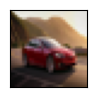

In [22]:
plt.figure(figsize = (1,1))
plt.imshow(dimensioned_image)
plt.xticks([])
plt.yticks([])
plt.show()

### <font color=orange>Converter a imagem para um array NumPy e normaliza</font>

* O trecho de código em Python realiza a conversão de uma imagem para um `array` `NumPy`, representando os valores dos pixels normalizados entre 0 e 1. A variável "`new_image_array`" recebe a imagem dimensionada, e cada valor é dividido por `255.0` para normalização. Esse processo é comum ao lidar com imagens, facilitando o processamento em algoritmos que se beneficiam de valores dentro desse intervalo.

In [35]:
new_image_array = np.array(dimensioned_image) / 255.0

### <font color=orange>Expandir as dimensões do array para que tenha o formato (1, 32, 32, 3)</font>

O trecho de código em Python realiza a expansão das dimensões de um array, representado por `new_image_array`, para atender ao formato desejado de (1, 32, 32, 3). Isso é alcançado através da utilização da função `np.expand_dims`, que adiciona uma dimensão ao array na posição especificada pela variável `axis`, neste caso, no eixo 0. Dessa forma, o array é transformado em um tensor unidimensional com as dimensões desejadas, facilitando seu processamento em determinadas operações, como em modelos de redes neurais convolucionais.

In [36]:
expanded_image_array = np.expand_dims(new_image_array, axis=0)

### <font color=orange>Obter as previsões a partir da aplicação de um modelo</font>

* No trecho de código em Python fornecido, a variável "`predictions`" armazena as previsões obtidas a partir da aplicação de um modelo (representado por "`model_object`") a um array de imagem expandido ("`expanded_image_array`"). Essas previsões são resultados do processo de inferência do modelo, indicando as classificações ou estimativas associadas à imagem processada. O uso da função "`predict`" é fundamental para obter insights ou realizar tarefas específicas, dependendo da natureza do modelo, como em problemas de aprendizado de máquina.

In [37]:
predictions = model_object.predict(expanded_image_array)

1/1 [==============================] - 9s 9s/step


### <font color=orange>Exibir as previsões resultantes de algum modelo ou algoritmo</font>

* No código fornecido, a instrução "`print(predictions)`" exibe as previsões resultantes de algum modelo ou algoritmo. Essas previsões podem representar a saída de um modelo de aprendizado de máquina, por exemplo. O comando "`print`" é utilizado para visualizar essas previsões na saída do console, facilitando a compreensão do desempenho ou resultados obtidos. Essa linha de código é essencial para a análise e depuração de modelos, permitindo uma rápida inspeção das previsões geradas.

In [38]:
print(predictions)

[[5.5990811e-04 9.8901224e-01 1.2247701e-05 7.9232232e-06 8.0604804e-07
  8.2555886e-07 1.4276206e-04 1.0796369e-07 2.9375483e-04 9.9693779e-03]]


### <font color=orange>Obtém o índice da classe prevista com maior probabilidade e o nome correspondente</font>

* No código Python fornecido, a variável `predicted_class_index` recebe o índice da classe prevista com a maior probabilidade a partir de um conjunto de previsões. Em seguida, a variável `predicted_class_name` é usada para obter o nome da classe correspondente a esse índice. Por fim, é exibida a mensagem indicando a classe na qual a nova imagem foi classificada, utilizando o nome da classe previamente determinado. Esse código é útil para identificar e comunicar a classe predominante na classificação da imagem.

In [40]:
predicted_class_index = np.argmax(predictions)
predicted_class_name = image_classes[predicted_class_index]

print("A nova imagem foi classificada como:", predicted_class_name)

A nova imagem foi classificada como: automobile
